## Nearest Neighbors :  K-Nearest Neighbors

K-NN a diferencia de otros algoritmos como la regresión logística, no cuenta con una función de aprendizaje para el entrenamiento,sin embargo, usa todo su esfuerzo en clasificar con todos los datos de entrenamiento, por ello se le denomina un lazy leaner, no le dedica el esfuerzo al entrenamiento sino  utiliza toda la data train para la clasificacion.

#### ¿Cuál es la idea del algoritmo? 
Tenemos un gráfica 2d que representan 2 variables(x,y) y los puntos representan los ejemplos, cada ejemplo está etiquetado con un cuadrado o un círculo que representan el grupo al que pertenecen.

 ![imagen1](https://i.ibb.co/k0r1LkL/scenario1.png)

![scenario1.png](attachment:https://i.ibb.co/k0r1LkL/scenario1.png)

La estrellita sería el punto que queremos clasificar  a uno de los dos grupos. Para  el caso de 3-NN, la idea es observar a los tres puntos  más cercanos a la estrellita y contar cuantos de ellos pertenecen al grupo del cuadrado y cuantos pertenecen al grupo del círculo.

![imagen2](https://i.ibb.co/yPZY6C0/scenario2.png)

Cómo vemos los tres puntos más cercanos son los círculos, por lo tanto, por mayoría la estrellita sería clasificado al grupo de los círculos.

#### ¿Cómo medimos númericamente la distancia?

En la gráfica 2D  es fácil identificar visualmente que puntos son los más cercanos a la estrella, esto es porque estamos en el supuesto de que tenemos sólo dos variables (feutures), sin embargo imagina que ya no fuera sólo dos variables sinó n-variables, para este caso la tarea es mucho más dificil, ya que no podemos ver en n-dimensiones. Por lo tanto, necesitamos una función que mida la cercanía o lejanía de un punto específico con respecto a otros; para esto existe varias medidas de distancias o también medidas de disimilitud, la más usada y conocida es la distancia Euclidiana.

Distancia Euclidiana (caso dos variables) <br><br>
$ \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} $

Sólo para fines de ejemplo usaremos dos variables, la distancia euclidiana y el parametro k = 3(que sígnifica contar solo los tres vecinos más cercanos.

In [1]:
import numpy as np
import pandas as pd

In [2]:
exampleData = pd.DataFrame([[4,9,'A'],[2,6,'A'],[8,1,'B'],[5,5,'B'],[6,10,'A'],[6,2,'?'],[10,5,'B']],columns=['x','y','grupo'])
exampleData

,x,y,grupo
0,4,9,A
1,2,6,A
2,8,1,B
3,5,5,B
4,6,10,A
5,6,2,?
6,10,5,B


Para clasificar a que grupo pertenece el ejemplo 5 , cumplamos con el primer paso que es obtener las distancia respecto a los otros puntos.

In [3]:
def DistEuclidiana(x,y):
    return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

In [4]:
dist = {}
for i in [0,1,2,3,4,6]:
    dist[i] = DistEuclidiana(exampleData.loc[5],exampleData.loc[i])
dist

{0: 7.280109889280518,
 1: 5.656854249492381,
 2: 2.23606797749979,
 3: 3.1622776601683795,
 4: 8.0,
 6: 5.0}

Como vemos los ejemplos 2,3 y 6 son los más cercanos al ejemplo 5('?') por tener menor distancia euclidiana. y estos tres pertenecen al grupo B, por lo tanto, el ejemplo 5 es clasificado como grupo B<BR>

#### Consideraciones al aplicar KNN

* La escala de las variables suelen ser diferentes, esto puede causar que una variable influya más que otras en las medidas de distancia.Por ello, es importante normalizar los datos para que todas las variables estén en la misma escala.
* Es importante tener un k adecuado; lo que se suele hacer es usar validación cruzada para determinar el k óptimo. <br>
* Existen otras consideraciones, por ejemplo, cuando hay empates en las frecuencias, es decir,cuando hay 2 vecinos del grupo B y dos vecinos del grupo A, entonces se especifica alguna regla adicional para desempatar. Otras consideraciones que podríamos mencionar es  cuando se incluyen variables cualitativas, la cual lo que se suele hacer es convertirlas en variables dummy y usar otro tipo de medida de distancia más adecuada.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.neighbors as nk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.datasets import load_breast_cancer
%matplotlib inline

### Descripción de la data

In [6]:
data_cargada = load_breast_cancer()
print(data_cargada.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

### Extrayedo la data

In [7]:
X = data_cargada.data
Y = pd.Categorical(data_cargada.target)
data = pd.DataFrame(X,columns=data_cargada.feature_names)

In [8]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Convertiendo a una misma escala

In [9]:
#funcion minmax
def scal(x):
    return(x-min(x))/(max(x)-min(x))

In [10]:
#aplicamos a cada columna
data = data.apply(scal,axis=0)

In [11]:
X = data.values

### Hallando el k-óptimo con Cross Validation (kbloques=5,rep=10)

In [12]:
metrics=pd.DataFrame(columns=['accuracy','recall','precision','k','r'])
for rep in range(1,11):
    kfol = KFold(n_splits=5,shuffle=True)
    for xtrain,xtest in kfol.split(X) :
        for j in range(1,26) :    
                mod = nk.classification.KNeighborsClassifier(n_neighbors=j).fit(X=X[xtrain],y=Y[xtrain])
                prediccion = mod.predict(X[xtest])                                                                     
                a = pd.crosstab(Y[xtest],prediccion)
                recall = a.iloc[1,1]/sum(a.iloc[1,:]) 
                precision=a.iloc[1,1]/sum(a.iloc[:,1]) 
                accuracy = (a.iloc[0,0]+a.iloc[1,1])/sum(a.sum())
                metrics=pd.concat([metrics,pd.DataFrame([[accuracy,recall,precision,j,rep]],columns=['accuracy','recall','precision','k','r'])])

In [13]:
np.mean(metrics.accuracy)#promedio general

0.9641269989132155

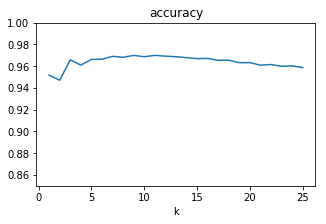

In [14]:
mean = metrics.groupby('k').mean()
mean.accuracy.plot(ylim=(0.85,1),figsize=(5,3),title='accuracy')

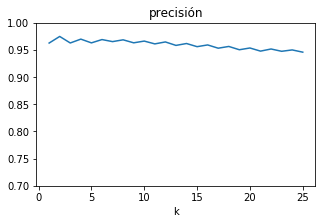

In [15]:
mean.precision.plot(ylim=(0.7,1),figsize=(5,3),title='precisión')

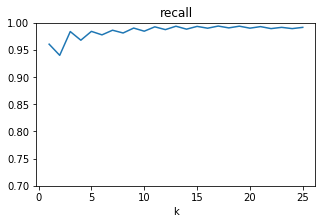

In [16]:
mean.recall.plot(ylim=(0.7,1),figsize=(5,3),title='recall')

En conclusión, evaluando la precisión y el accuracy nos quedaríamos con 3 vecinos (K = 3) para hacer las predicciones. Hay mucho más detalles que ver al momento de abordar un problema, en este caso las feutures eran todas cuantitaivas, sin embargo, para los casos donde haya variables cualitativas se usan otras medidas de distancia y normalizar las variables.